# Cifar-10 : reconnaissance d'images

la base CIFAR-10 contient 60 000 petites images de 10 types différents
1. il y a 50 000 images pour l’apprentissage et 10 000 pour les tests
2. chaque image est de taille 32 × 32 pixels en couleur
3. 1 pixel couleur est codé par trois entiers (r, g, b) compris entre 0 et 255
4. 1 image est donc composée de 32 × 32 × 3 nombres
3. chaque image appartient à une des dix catégories suivantes : avion, auto, oiseau, chat, biche, chien, grenouille, cheval, bateau et camion

## 1. modules à charger

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Données

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train_data, Y_train_data), (X_test_data, Y_test_data) = cifar10.load_data()

num_classes = 10
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Y_train = keras.utils.to_categorical(Y_train_data, num_classes)
Y_test = keras.utils.to_categorical(Y_test_data, num_classes)
X_train = X_train_data.reshape(50000,32*32*3)
X_test = X_test_data.reshape(10000,32*32*3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

## 3. Afficher les images

In [ ]:
import matplotlib.pyplot as plt

def affiche_images(debut):
    plt.axis('off')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        print(Y_train_data[i+debut][0])
        plt.title(labels[Y_train_data[i+debut][0]])
        plt.imshow(X_train_data[i], interpolation='nearest')
    plt.tight_layout()
    plt.show()

    return

#affiche_images(0)

## 4. Réseau

In [ ]:
modele = Sequential()

p = 30
modele.add(Dense(p, input_dim=32*32*3, activation='sigmoid'))
modele.add(Dense(p, activation='sigmoid'))
modele.add(Dense(p, activation='sigmoid'))
modele.add(Dense(p, activation='sigmoid'))
modele.add(Dense(10, activation='softmax'))

# Méthode de gradient : descente de gradient stochastique avec taux d'apprentissage donné
# mysgd = optimizers.SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
# modele.compile(loss='categorical_crossentropy', optimizer=mysgd, metrics=['accuracy'])

modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affiche un résumé
print(modele.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                92190     
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
Total params: 95,290
Trainable params: 95,290
Non-trainable params: 0
_________________________________________________________________
None


## 5. Entrainement du modèle

In [ ]:
# Partie C. Apprentissage
modele.fit(X_train, Y_train, epochs=1, batch_size=32)

1563/1563 [==============================] - 7s 3ms/step - loss: 2.1746 - accuracy: 0.1584


## 5. Résultats et Visualisation

Test erreur (loss) : 2.075930118560791
Test précision (accuracy) : 0.17820000648498535
313/313 [==============================] - 1s 2ms/step


<ipython-input-14-bb32514c82a2>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


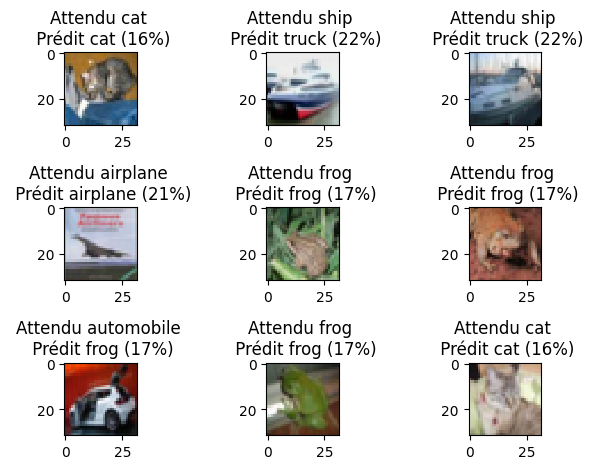

In [ ]:
score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test erreur (loss) :', score[0])
print('Test précision (accuracy) :', score[1])


Y_predict = modele.predict(X_test)

def affiche_images_test(debut):
    plt.axis('off')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        image_predite = Y_predict[i]
        perc_max = int(round(100*np.max(image_predite)))
        rang_max = np.argmax(image_predite)
        titre = 'Attendu ' + labels[Y_test_data[i][0]] + ' \n Prédit ' + labels[rang_max] + ' (' + str(perc_max) + '%)'
        plt.title('Attendu %d - Prédit %d (%d%%)' % (Y_test_data[i],rang_max,perc_max))
        plt.title(titre)
        plt.imshow(X_test_data[i], interpolation='nearest')
    plt.tight_layout()
    # plt.savefig('tf2-images-test.png')
    plt.show()

    return

affiche_images_test(0)

modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])